# Занятие 6
## Симуляции и работа со случайными величинами

In [1]:
# импортируем заранее библиотеки, которыми будем пользоваться
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import random

### модуль `random`

In [2]:
# случайная величина на [0, 1)
random.random()

0.3452680961760054

In [3]:
# набор таких случайных величин
[random.random() for i in range(10)]

[0.21868353207122193,
 0.2046989321380226,
 0.39418726536035953,
 0.1949552844053556,
 0.5966247358092432,
 0.41845806915318073,
 0.32286725477671885,
 0.928471140030016,
 0.6460097807987115,
 0.28391675269579686]

(array([ 935., 1004., 1008.,  993., 1053., 1038.,  938., 1040.,  977.,
        1014.]),
 array([7.63375563e-05, 1.00060999e-01, 2.00045661e-01, 3.00030323e-01,
        4.00014985e-01, 4.99999647e-01, 5.99984309e-01, 6.99968971e-01,
        7.99953633e-01, 8.99938295e-01, 9.99922956e-01]),
 <BarContainer object of 10 artists>)

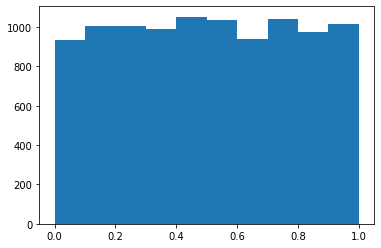

In [4]:
# посмотрим как эти случайные величины распределены
data = [random.random() for i in range(10000)]
plt.hist(data)

In [5]:
# случайная величина нормального распределения
random.gauss(0, 1)

-1.2639587510039838

(array([2.000e+00, 3.600e+01, 2.830e+02, 1.139e+03, 2.560e+03, 3.065e+03,
        2.011e+03, 7.280e+02, 1.590e+02, 1.700e+01]),
 array([-4.24109474, -3.4442156 , -2.64733645, -1.85045731, -1.05357816,
        -0.25669902,  0.54018013,  1.33705928,  2.13393842,  2.93081757,
         3.72769671]),
 <BarContainer object of 10 artists>)

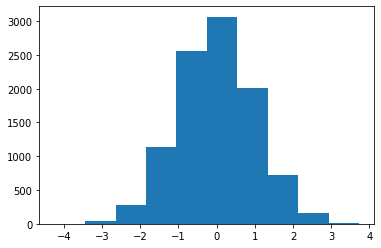

In [6]:
data = [random.gauss(0, 1) for i in range(10000)]
plt.hist(data)

In [ ]:
help(plt.hist)

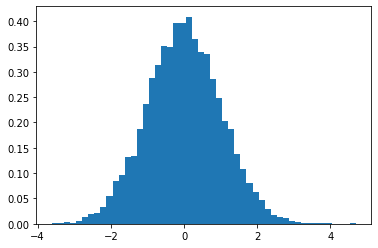

In [7]:
# отрисуем с учетом количества прямоугольников и c нормализацией
data = [random.gauss(0, 1) for i in range(10000)]
plt.hist(data, bins=50, density=True)
plt.show()

In [ ]:
# посмотрим на объект для работы с нормальным распредлением в пакете scipy.stats
help(stats.norm)

In [ ]:
help(gaussian)

In [8]:
gaussian = stats.norm(0, 1)
# значение функции плотности распределения в точке
gaussian.pdf(0)

0.3989422804014327

In [9]:
x = [item for item in range(-4, 5)]
x

[-4, -3, -2, -1, 0, 1, 2, 3, 4]

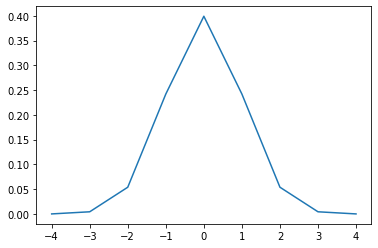

In [10]:
data = [gaussian.pdf(item) for item in x]
plt.plot(x, data)

In [11]:
# добавим побольше точек
x = [item/100 for item in range(-400, 401)]

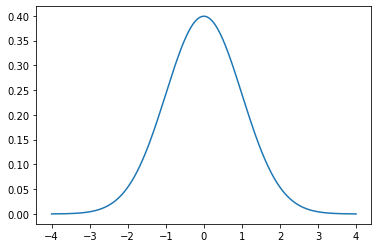

In [12]:
data = [gaussian.pdf(item) for item in x]
plt.plot(x, data)

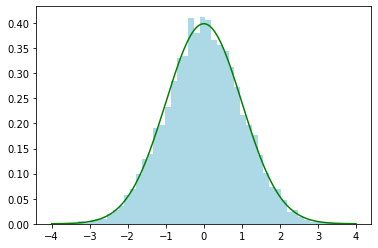

In [13]:
# отрисуем теоретическую и выборочную функции распределения рядом
sample_dist = [random.gauss(0, 1) for i in range(10000)]
plt.hist(sample_dist, bins=50, density=True, color='lightblue')

x = [item/100 for item in range(-400, 401)]
theory_dist = [gaussian.pdf(item) for item in x]
plt.plot(x, theory_dist, color='green')

plt.show()

## Задание
Сделать визуализацию по аналогии с визуализацией выше по экспоненциальному распределению

* Теоретическую функцию распределения можно найти в модуле `stats`
* Для выборочной функции распределения функцию генерации можно найти в модуле `np.random`

[]

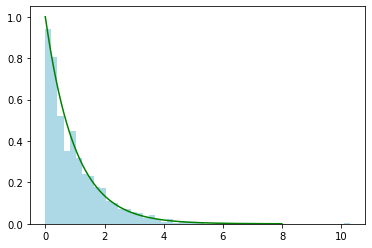

In [14]:
sample_dist = np.random.exponential(1, 1000)
plt.hist(sample_dist, bins=50, density=True, color='lightblue')

x = [item/100 for item in range(0, 800)]
theory_dist = [stats.expon.pdf(item) for item in x]
plt.plot(x, theory_dist, color='green')

plt.show()

***

In [15]:
# высчитаем десятый перцентиль
data = [random.gauss(0, 1) for i in range(10000)]
percentile_10 = sorted(data)[int(len(data)*0.1)]
percentile_10

-1.251627050129732

In [16]:
# создадим функцию для высчитывания десятого перцентиля
def percentile(data, x):
    return sorted(data)[int(len(data)*x/100)]

data = [random.gauss(0, 1) for i in range(10000)]
percentile_10 = percentile(data, 10)
percentile_10

-1.2697479524530095

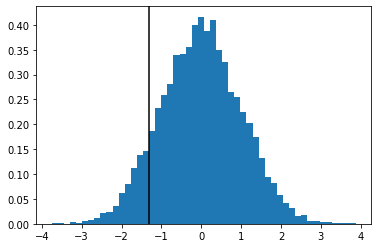

In [17]:
data = [random.gauss(0, 1) for i in range(10000)]
percentile_10 = percentile(data, 10)

plt.hist(data, bins=50, density=True)
plt.axvline(x=percentile_10, color='black')
plt.show()

t-values two-sided
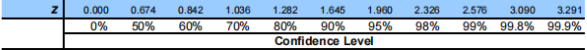

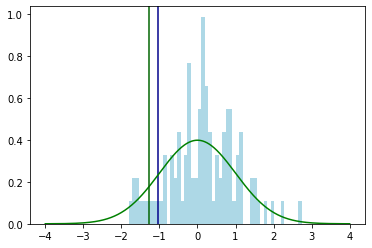

In [18]:
# отрисуем все вместе
sample_dist = [random.gauss(0, 1) for i in range(100)]
sample_percentile_10 = percentile(sample_dist, 10)

plt.hist(sample_dist, bins=50, density=True, color='lightblue')
plt.axvline(x=sample_percentile_10, color='darkblue')


x = [item/100 for item in range(-400, 401)]
theory_dist = [gaussian.pdf(item) for item in x]
theory_percentile_10 = -1.282

plt.plot(x, theory_dist, color='green')
plt.axvline(x=theory_percentile_10, color='darkgreen')

plt.show()

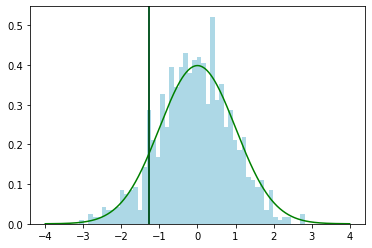

In [19]:
# то же самое, используя возможности и объекты numpy
sample_dist = np.random.randn(1000)
sample_percentile_10 = np.percentile(sample_dist, 10)

plt.hist(sample_dist, bins=50, density=True, color='lightblue')
plt.axvline(x=sample_percentile_10, color='darkblue')


x = np.linspace(-4, 4, 1000)
theory_dist = gaussian.pdf(x)
theory_percentile_10 = -1.282

plt.plot(x, theory_dist, color='green')
plt.axvline(x=theory_percentile_10, color='darkgreen')

plt.show()

## Задание

Добавить на график статитстики экспоненциального распределения отсечку по 95 перцентилю для выборочного распределения  
Для колонок гистограммы справа от данной отсечки установить другой цвет

Результат должен выглядеть примерно так:
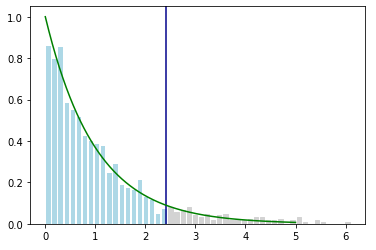

[]

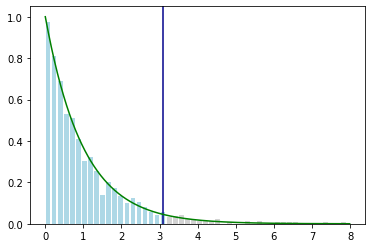

In [20]:
sample_dist = np.random.exponential(1, 1000)
n, bins, patches = plt.hist(sample_dist, bins=50, density=True, color='lightblue', rwidth=0.7)

sample_percentile_10 = np.percentile(sample_dist, 95)
plt.axvline(x=sample_percentile_10, color='darkblue')

for patch in patches:
    if patch.xy[0] > sample_percentile_10:
        patch.set_color("lightgrey")

x = [item/100 for item in range(0, 800)]
theory_dist = [stats.expon.pdf(item) for item in x]
plt.plot(x, theory_dist, color='green')

plt.plot()

***

## Симуляции Монте-Карло для визуализации модели Монте-Карло

### ?

**Метод Монте-Карло** - метод генерирования случайных последовательностей некой вероятностной модели  

Используется во множестве алгоритмов симуляций для разных целей.  
В частности, когда целью является моделирование, то такое моделирование называется моделированием методом Монте-Карло. Может быть реализовано следующим алгоритмом:

1. Генерируется случайные наблюдения по априорным законам. Наблюдения используются для посчета модельной статистики (шаг "итерация")
2. Выполняется множество итераций, на основе чего строится итоговое распределение (гистограмма), высчитываются интересующие показатели, строится динамика

In [21]:
# у нас есть некое случайное событие (пусть оно описывается равномерной функцией распределения от 0 до 1)
# в нашей модели нам интересна следующая статистика: сумма 10 событий
# распределение этой статистики мы и построим методом Монте-Карло

In [22]:
def mc_iteration():
    summ = 0
    for i in range(10):
        summ += random.random()
    return summ


data = []
for i in range(10000):
    data.append(mc_iteration())

(array([0.0031483 , 0.02030654, 0.09539349, 0.23029815, 0.39857479,
        0.41006608, 0.26477203, 0.11711676, 0.03006627, 0.00440762]),
 array([1.75603845, 2.39130192, 3.02656538, 3.66182885, 4.29709232,
        4.93235578, 5.56761925, 6.20288272, 6.83814618, 7.47340965,
        8.10867312]),
 <BarContainer object of 10 artists>)

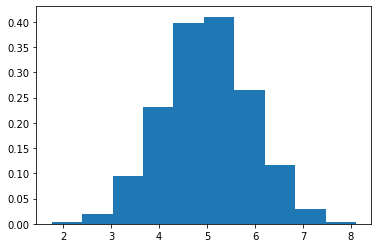

In [23]:
plt.hist(data, density=True)

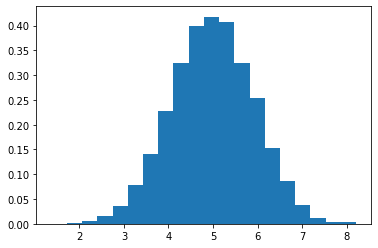

In [24]:
data = []
for i in range(10000):
    iteration = np.sum(np.random.uniform(0, 1, 10))
    data.append(iteration)

plt.hist(data, bins=20, density=True)
plt.show()

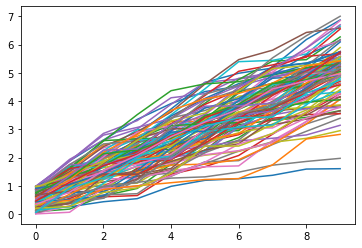

In [25]:
def mc_iteration():
    summ_trajectory = []
    summ = 0
    for i in range(10):
        summ += random.random()
        summ_trajectory.append(summ)
    plt.plot(summ_trajectory)
    return summ

for i in range(100):
    mc_iteration()

plt.show()

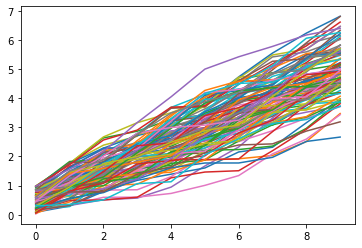

In [26]:
# визуализация симуляций
def mc_iteration():
    event_sum = 0
    event_trajectory = []
    for i in range(10):
        event = np.random.uniform(0, 1)
        event_sum += event
        event_trajectory.append(event_sum)

    plt.plot(event_trajectory)
    return event_sum

data = []
for i in range(100):
    iteration = mc_iteration()
    data.append(iteration)